In [1]:
import pandas as pd

In [2]:
mylynx_df = pd.read_csv("LYNXdata.csv", header = 0,
                     names = ['year', 'trappings'],
                     index_col = 0)

In [3]:
nottem_df = pd.read_csv("nottem.csv", header = 0,
                        names = ['index', 'temp'],
                        index_col = 0)

In [4]:
mylynx_df.head()

,trappings
year,
1821,269
1822,321
1823,585
1824,871
1825,1475


In [5]:
nottem_df.head()

,temp
index,
1,40.6
2,40.8
3,44.4
4,46.7
5,54.1


In [6]:
# Converting the DataFrame into a Series object
# New index generation with a proper date index and frequency
mylynxts = pd.Series(mylynx_df['trappings'].values,
                     index = pd.date_range('31/12/1821' ,
                                           periods = 114,
                                           freq = 'A-DEC'))

In [7]:
# Converting the DataFrame into a Series object
# Proper time stamp with monthly frequency
nottemts = pd.Series(nottem_df['temp'].values,
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))

In [8]:
mylynxts.head()

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
Freq: A-DEC, dtype: int64

In [9]:
nottemts.head()

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
Freq: M, dtype: float64

## The Statistics of Time Series

In [10]:
import numpy as np
import matplotlib.pyplot as plt

mylynx_df = pd.read_csv("LYNXdata.csv", header = 0,
                     names = ['year', 'trappings'],
                     index_col = 0)

In [11]:
mylynxts = pd.Series(mylynx_df['trappings'].values,
                     index = pd.date_range('31/12/1821' ,
                                           periods = 114,
                                           freq = 'A-DEC'))

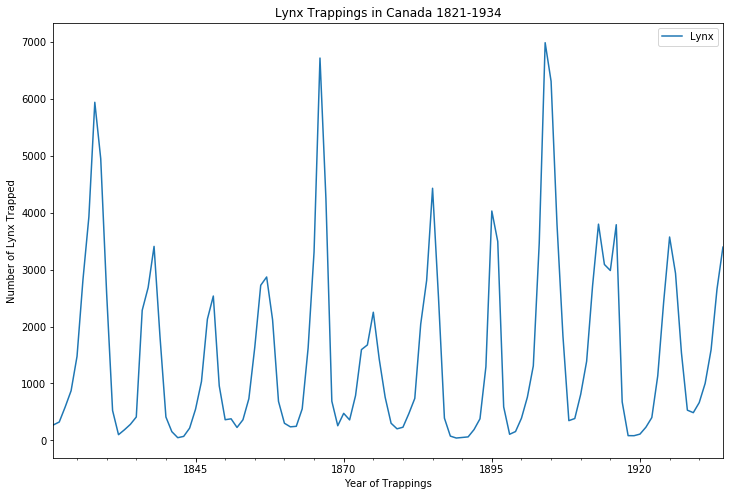

In [12]:
# Visualizing time series in Python
# 1. Line graph with matplotlib pyplot module
plt.figure(figsize=(12,8))
mylynxts.plot()
plt.title('Lynx Trappings in Canada 1821-1934')
plt.xlabel('Year of Trappings')
plt.ylabel('Number of Lynx Trapped')
plt.legend(['Lynx']);

In [13]:
# Getting the cumulative total of mylynxts
cumsum_lynx = np.cumsum(mylynxts)

In [14]:
cumsum_lynx.head()

1821-12-31     269
1822-12-31     590
1823-12-31    1175
1824-12-31    2046
1825-12-31    3521
Freq: A-DEC, dtype: int64

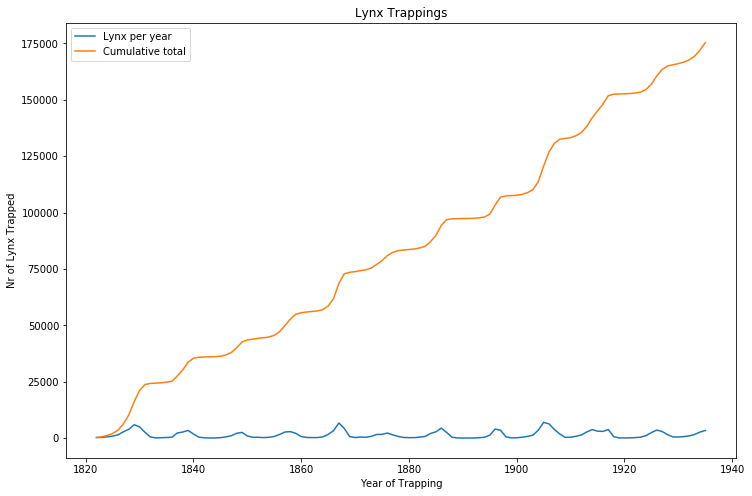

In [15]:
# Plotting two series on the same axes
plt.figure(figsize=(12,8))
plt.plot(mylynxts)
plt.plot(cumsum_lynx)
plt.title('Lynx Trappings')
plt.xlabel('Year of Trapping')
plt.ylabel('Nr of Lynx Trapped')
plt.legend(['Lynx per year', 'Cumulative total']);

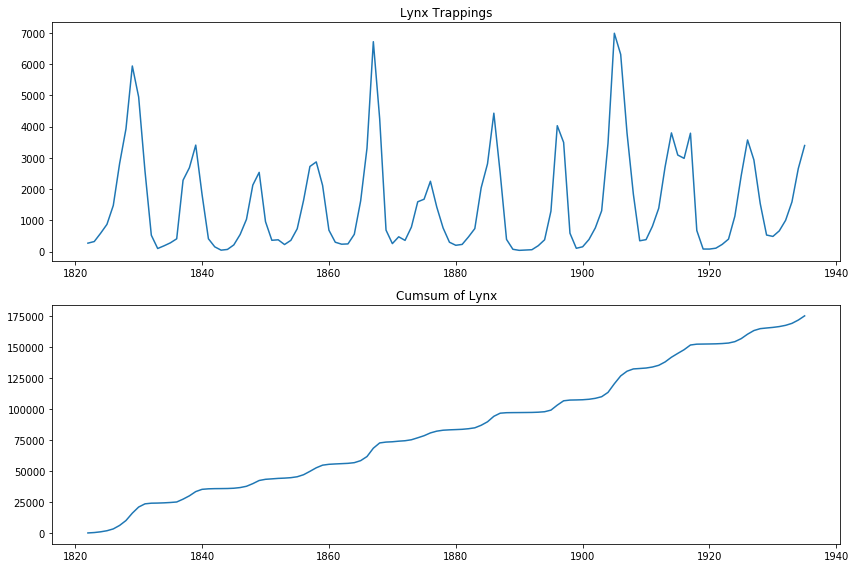

In [16]:
# 3. Two plots in the same figure with subplots
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(mylynxts)
plt.title('Lynx Trappings')

plt.subplot(2,1,2)
plt.plot(cumsum_lynx)
plt.title('Cumsum of Lynx')
plt.tight_layout()

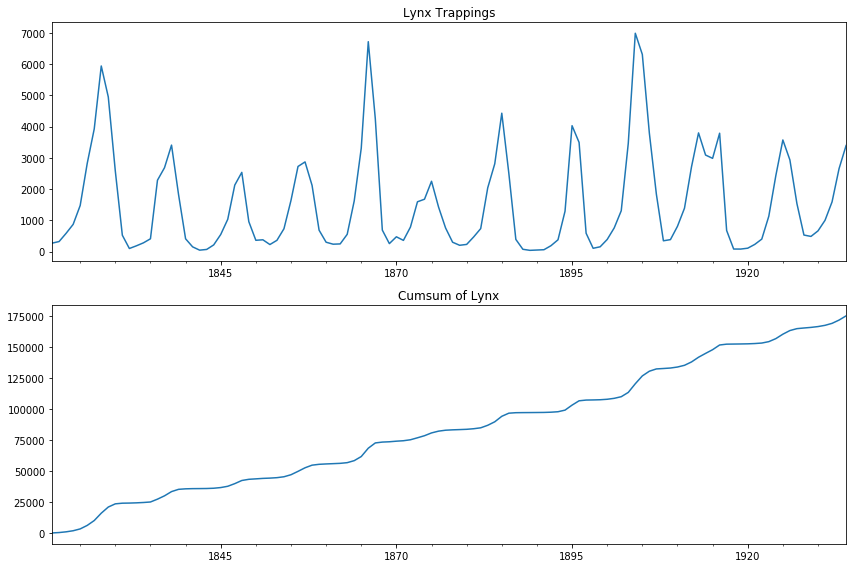

In [17]:
# Alternative method with classes
# Integrating plotting tools in the matplotlib environment
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12,8))
mylynxts.plot(ax = ax1)
cumsum_lynx.plot(ax = ax2)
ax1.set_title("Lynx Trappings")
ax2.set_title("Cumsum of Lynx")
plt.tight_layout();

In [18]:
# Test for stationarity
def stationarity_test(timeseries):
    """"Augmented Dickey-Fuller test
    A test for stationarity"""
    from statsmodels.tsa.stattools import adfuller
    print("Results of Dickey-Fuller Test:")
    df_test = adfuller(timeseries, autolag = "AIC")
    df_output = pd.Series(df_test[0:4],
                          index = ["Test statistic", "p-value",
                                   "Number of lags used",
                                   "Number of observations used"])
    print(df_output)

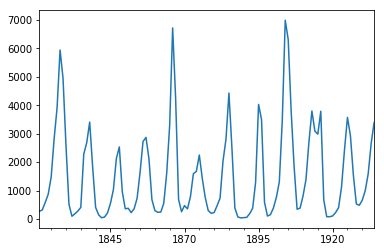

In [19]:
mylynxts.plot();

In [20]:
# Applying the test on three different datasets
stationarity_test(mylynxts)

Results of Dickey-Fuller Test:
Test statistic                  -2.996304
p-value                          0.035241
Number of lags used              7.000000
Number of observations used    106.000000
dtype: float64


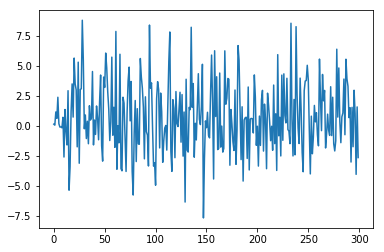

In [21]:
# Note the characteristics of stationary data on the plot
plt.plot(np.random.normal(1, 3, 300));

In [22]:
stationarity_test(np.random.normal(1, 3, 300))

Results of Dickey-Fuller Test:
Test statistic                -1.827663e+01
p-value                        2.313242e-30
Number of lags used            0.000000e+00
Number of observations used    2.990000e+02
dtype: float64


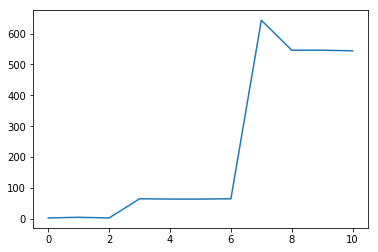

In [23]:
# Note the three levels in the data
mydata = (3, 5, 3, 65, 64, 64, 65, 643, 546, 546, 544)
plt.plot(mydata);

In [24]:
stationarity_test(mydata)

Results of Dickey-Fuller Test:
Test statistic                -0.000000
p-value                        0.958532
Number of lags used            5.000000
Number of observations used    5.000000
dtype: float64


D:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [25]:
# Importing ACF and PACF plot functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

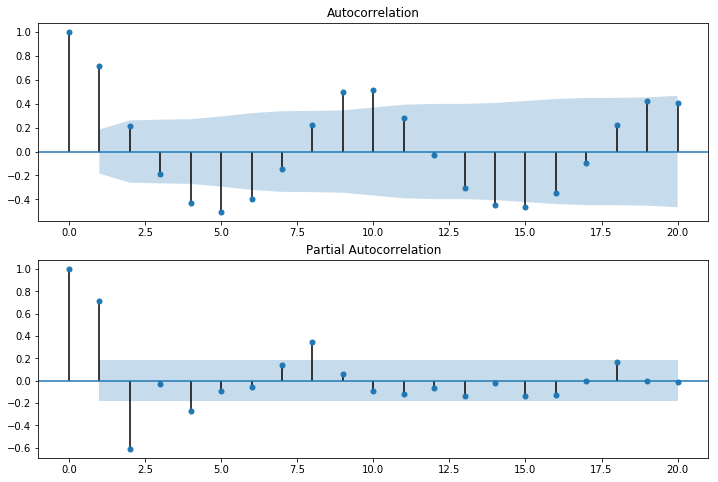

In [26]:
# Autocorrelation and partial autocorrelation in the Lynx dataset
# Two plots on one sheet
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12,8))
plot_acf(mylynxts, lags= 20, ax = ax1)
plot_pacf(mylynxts, lags = 20, ax = ax2);

In [27]:
# Simple moving average (rolling mean)
def plot_rolling(timeseries, window):
    rol_mean = timeseries.rolling(window).mean()
    rol_std = timeseries.rolling(window).std()
    
    fig = plt.figure(figsize = (12, 8))
    og = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rol_mean, color = "red", label = "Rolling Mean")
    std = plt.plot(rol_std, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation (window = "+str(window)+")")
    plt.show()

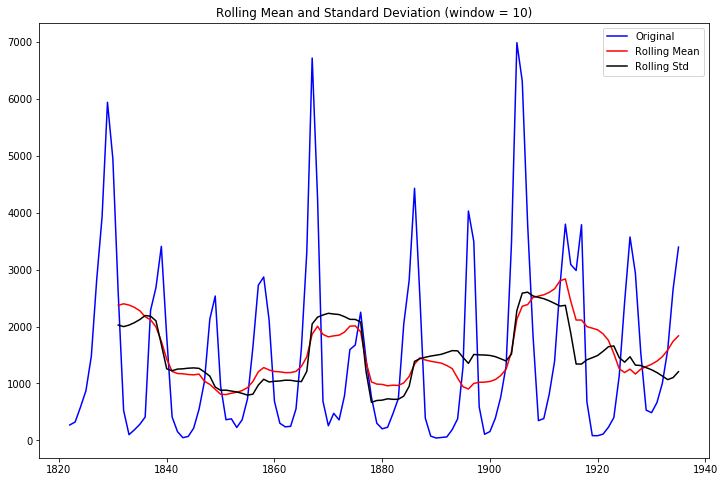

In [28]:
plot_rolling(mylynxts, 10)

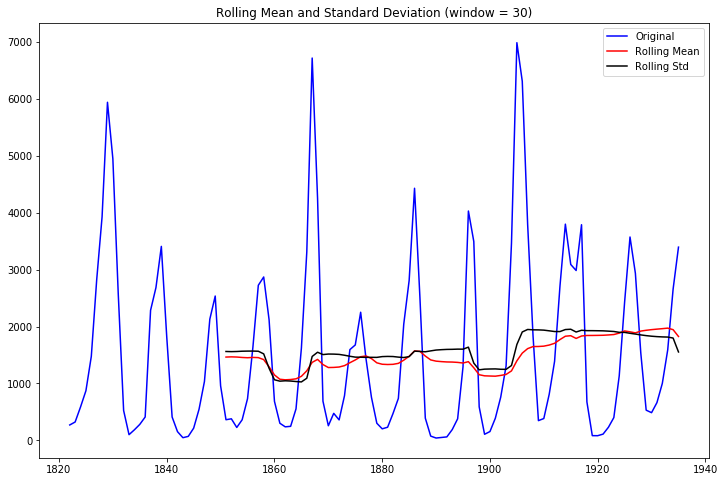

In [29]:
plot_rolling(mylynxts, 30)

In [30]:
mylynxts.rolling(10).mean()

1821-12-31       NaN
1822-12-31       NaN
1823-12-31       NaN
1824-12-31       NaN
1825-12-31       NaN
1826-12-31       NaN
1827-12-31       NaN
1828-12-31       NaN
1829-12-31       NaN
1830-12-31    2374.0
1831-12-31    2399.4
1832-12-31    2377.1
1833-12-31    2337.0
1834-12-31    2277.8
1835-12-31    2171.2
1836-12-31    2117.6
1837-12-31    1993.3
1838-12-31    1739.9
1839-12-31    1427.3
1840-12-31    1210.5
1841-12-31    1173.3
1842-12-31    1168.0
1843-12-31    1156.4
1844-12-31    1149.8
1845-12-31    1163.5
1846-12-31    1038.3
1847-12-31     982.7
1848-12-31     895.4
1849-12-31     808.7
1850-12-31     803.9
               ...  
1905-12-31    2356.1
1906-12-31    2386.0
1907-12-31    2510.9
1908-12-31    2534.9
1909-12-31    2557.8
1910-12-31    2599.9
1911-12-31    2662.9
1912-12-31    2803.5
1913-12-31    2837.0
1914-12-31    2447.0
1915-12-31    2114.2
1916-12-31    2113.8
1917-12-31    1997.6
1918-12-31    1971.2
1919-12-31    1941.0
1920-12-31    1871.0
1921-12-31   

In [31]:
# Simple rolling calculation with minimum number of periods for the window
def plot_rolling_min(timeseries, window):
    rol_mean = timeseries.rolling(window, min_periods = 1).mean()
    rol_std = timeseries.rolling(window, min_periods = 1).std()
    
    fig = plt.figure(figsize = (12, 8))
    og = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rol_mean, color = "red", label = "Rolling Mean")
    std = plt.plot(rol_std, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation (window = "+str(window)+")")
    plt.show()

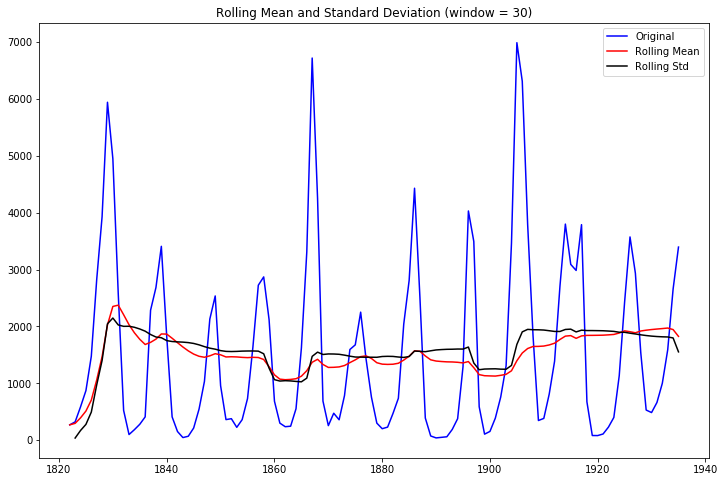

In [32]:
# No NaN values, but shorter window size if <30
plot_rolling_min(mylynxts, 30)

In [33]:
# Exponentially weighted moving average
# Note: the ewm method is applicable on pandas Series and DataFrame objects only
def plot_ewma(timeseries, alpha):
    expw_ma = timeseries.ewm(alpha=alpha).mean()

    fig = plt.figure(figsize = (12, 8))
    og_line = plt.plot(timeseries, color = "blue", label = "Original")
    exwm_line = plt.plot(expw_ma, color = "red", label = "EWMA")
    plt.legend(loc = "best")
    plt.title("EWMA (alpha= "+str(alpha)+")")
    plt.show()

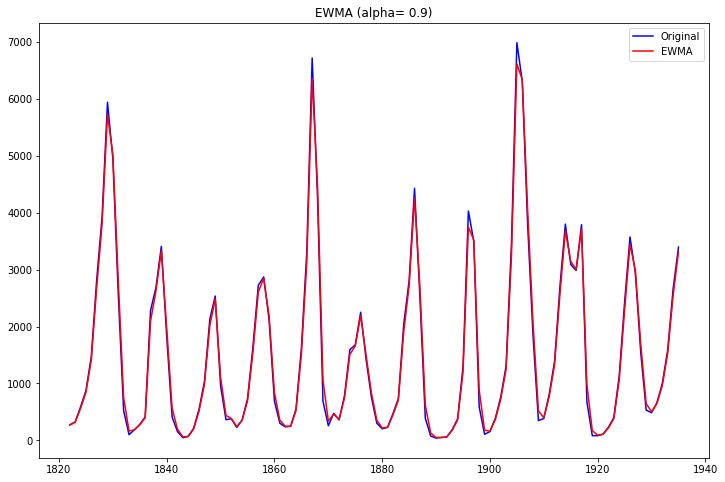

In [34]:
plot_ewma(mylynxts, 0.9)

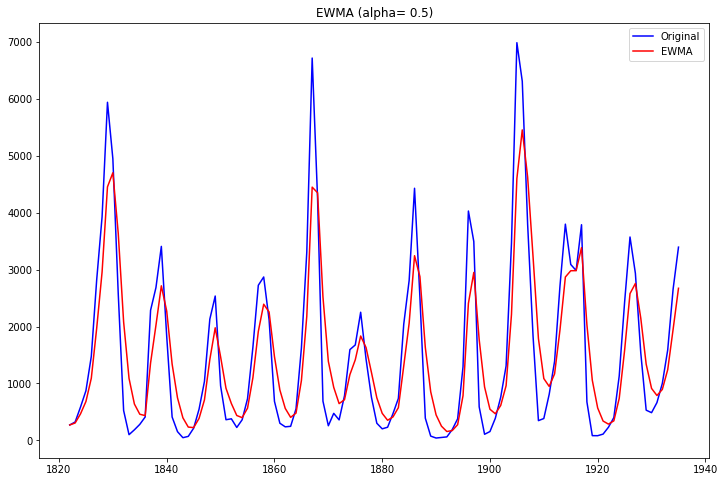

In [35]:
plot_ewma(mylynxts, 0.5)

## Creating a Time Series Forecast Using ARIMA Regressions

In [36]:
import statsmodels as sm

In [37]:
# Importing the Lynx dataset
# Make sure that LYNXdata.csv is in the same folder as this python notebook
mylynx_df = pd.read_csv("LYNXdata.csv", header = 0,
                        index_col = 0)

In [38]:
mylynx_df.head()

,trappings
year,
1821,269
1822,321
1823,585
1824,871
1825,1475


In [39]:
# Converting the DataFrame into a Series object
# ARIMA modeling requires a tuple index
mylynxts = pd.Series(mylynx_df['trappings'].values,
                 index = pd.DatetimeIndex(data = (tuple(pd.date_range('31/12/1821',
                                                                    periods = 114,
                                                                    freq = 'A-DEC'))),
                                            freq = 'A-DEC'))

In [40]:
mylynxts.head()

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
Freq: A-DEC, dtype: int64

In [41]:
# Getting the ARIMA modeling function
from statsmodels.tsa.arima_model import ARIMA

In [42]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |  If exogenous variables are given, then the model that is fit is
 

In [43]:
# ACF and PACF functions to test for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [44]:
stationarity_test(mylynxts)

Results of Dickey-Fuller Test:
Test statistic                  -2.996304
p-value                          0.035241
Number of lags used              7.000000
Number of observations used    106.000000
dtype: float64


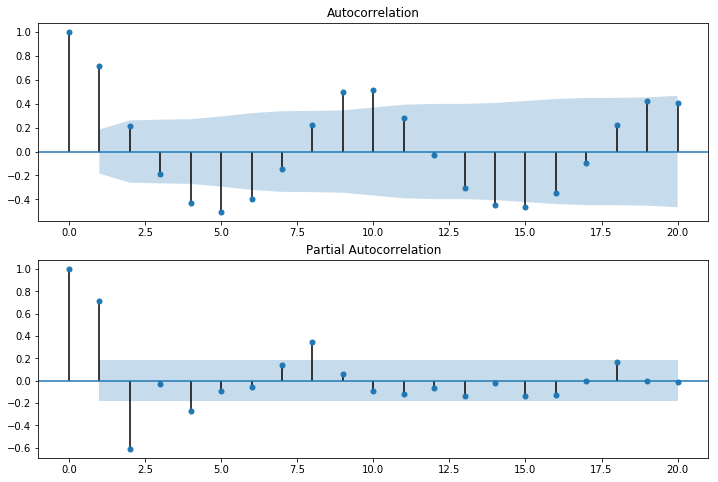

In [45]:
# ACF and PACF plots
# Note: Start with the plot that shows the least number of significant lags
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(mylynxts, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(mylynxts, lags=20, ax=ax2)

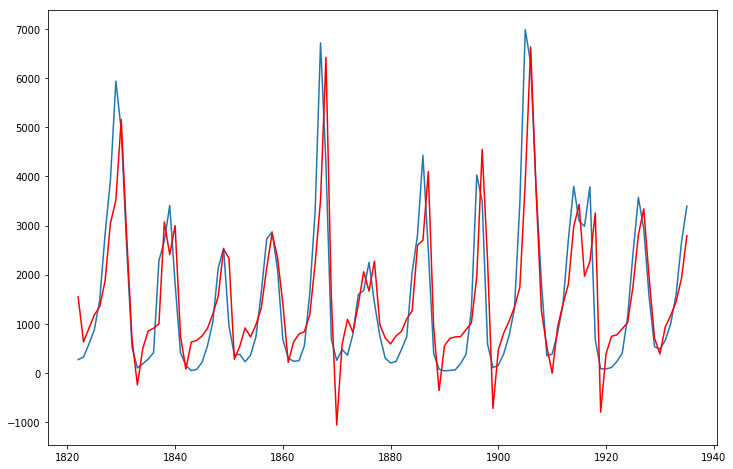

In [46]:
# ARIMA model 
model = ARIMA(mylynxts, order=(2, 0, 0))  
results_AR2 = model.fit()
plt.figure(figsize=(12,8))
plt.plot(mylynxts)
plt.plot(results_AR2.fittedvalues, color='red');

In [47]:
# Model residuals
mylynxts.tail()

1930-12-31     662
1931-12-31    1000
1932-12-31    1590
1933-12-31    2657
1934-12-31    3396
Freq: A-DEC, dtype: int64

In [48]:
results_AR2.fittedvalues.tail()

1930-12-31     938.216692
1931-12-31    1167.701864
1932-12-31    1449.379537
1933-12-31    1923.651379
1934-12-31    2794.113270
Freq: A-DEC, dtype: float64

In [49]:
results_AR2.resid.tail()

1930-12-31   -276.216692
1931-12-31   -167.701864
1932-12-31    140.620463
1933-12-31    733.348621
1934-12-31    601.886730
Freq: A-DEC, dtype: float64

In [50]:
# The last residual (601.867) = the last original observation (3396) - the last fitted value (2794.133)
3396-2794.133

601.8670000000002

In [51]:
# Original series - fitted values = model residuals
(mylynxts - results_AR2.fittedvalues).tail()

1930-12-31   -276.216692
1931-12-31   -167.701864
1932-12-31    140.620463
1933-12-31    733.348621
1934-12-31    601.886730
Freq: A-DEC, dtype: float64

In [52]:
# Residuals are close to a zero mean
np.mean(results_AR2.resid)

-5.084956680995323

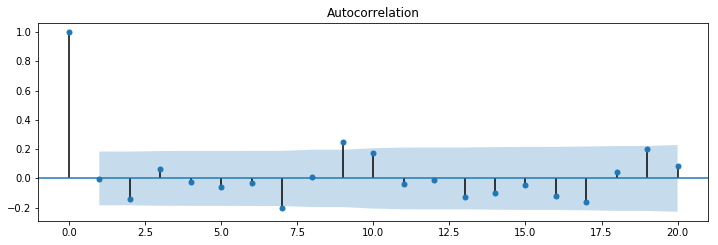

In [53]:
# ACF plot to test for autocorrelation in the residuals
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR2.resid, lags=20, ax=ax1)

In [54]:
# Custom function to test for a normal distribution
def resid_histogram(data):
    import matplotlib.pyplot as plt
    from numpy import linspace
    from scipy.stats import norm

    plt.figure(figsize=(10,6))
    plt.hist(data, bins = 'auto', density = True, rwidth = 0.85,
             label = 'Residuals')
    mean_resid, std_resid = norm.fit(data)
    xmin, xmax = plt.xlim()
    curve_length = linspace(xmin, xmax, 100)
    bell_curve = norm.pdf(curve_length, mean_resid, std_resid)
    plt.plot(curve_length, bell_curve, 'm', linewidth = 2)
    plt.grid(axis='y', alpha = 0.2)
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.title('Residuals vs Normal Distribution - Mean = '+str(round(mean_resid,2))+', Std = '+str(round(std_resid,2)))
    plt.show()

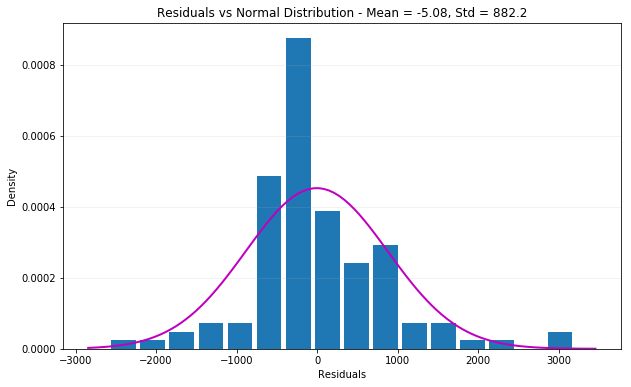

In [55]:
resid_histogram(results_AR2.resid)

In [56]:
# Model diagnostics and improvement
results_AR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:                     ARMA(2, 0)   Log Likelihood                -935.016
Method:                       css-mle   S.D. of innovations            876.447
Date:                Mon, 10 Jun 2019   AIC                           1878.032
Time:                        01:18:33   BIC                           1888.977
Sample:                    12-31-1821   HQIC                          1882.474
                         - 12-31-1934                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1545.3385    181.671      8.506      0.000    1189.269    1901.408
ar.L1.y        1.1474      0.074     15.459      0.000       1.002       1.293
ar.L2.y       -0.5997      0.074     -8.110      0.000      -0.745      -0.455
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9566           -0.8673j            1.2913           -0.1172
AR.2            0.9566           +0.8673j            1.2913            0.1172
-----------------------------------------------------------------------------
"""

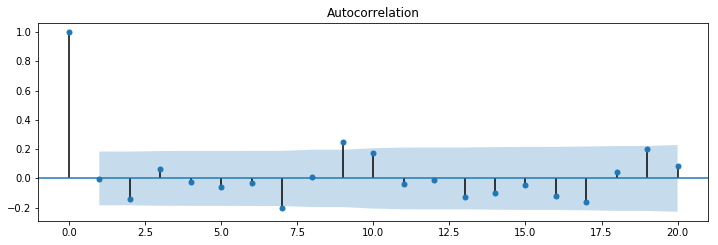

In [57]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR2.resid, lags=20, ax=ax1)

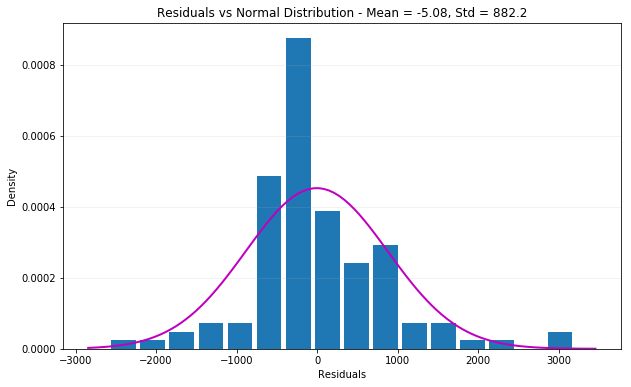

In [58]:
resid_histogram(results_AR2.resid)

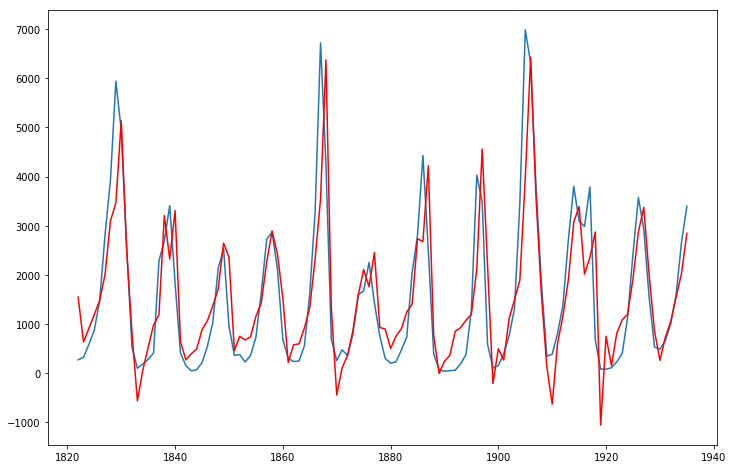

In [59]:
# Adjusting the model
model = ARIMA(mylynxts, order=(4, 0, 0))  
results_AR4 = model.fit()
plt.figure(figsize=(12,8))
plt.plot(mylynxts)
plt.plot(results_AR4.fittedvalues, color='red')

In [60]:
results_AR4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:                     ARMA(4, 0)   Log Likelihood                -931.111
Method:                       css-mle   S.D. of innovations            845.949
Date:                Mon, 10 Jun 2019   AIC                           1874.222
Time:                        01:18:36   BIC                           1890.639
Sample:                    12-31-1821   HQIC                          1880.885
                         - 12-31-1934                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1547.4367    136.851     11.307      0.000    1279.214    1815.659
ar.L1.y        1.1246      0.090     12.450      0.000       0.948       1.302
ar.L2.y       -0.7174      0.137     -5.250      0.000      -0.985      -0.450
ar.L3.y        0.2634      0.136      1.935      0.056      -0.003       0.530
ar.L4.y       -0.2543      0.090     -2.837      0.005      -0.430      -0.079
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9198           -0.6880j            1.1486           -0.1022
AR.2            0.9198           +0.6880j            1.1486            0.1022
AR.3           -0.4020           -1.6789j            1.7264           -0.2874
AR.4           -0.4020           +1.6789j            1.7264            0.2874
-----------------------------------------------------------------------------
"""

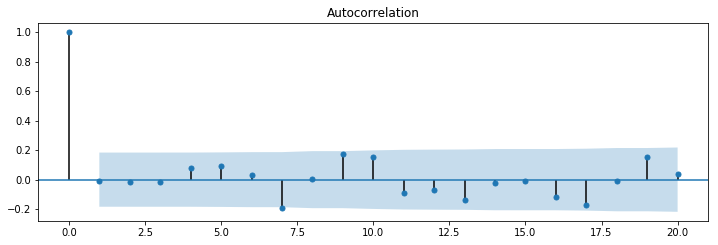

In [61]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR4.resid, lags=20, ax=ax1)

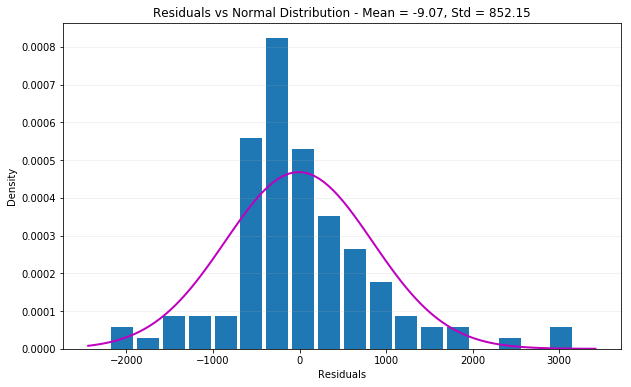

In [62]:
resid_histogram(results_AR4.resid)

In [63]:
# ARIMA forecast
Fcast400 = results_AR4.predict(start = '31/12/1935',
                               end = '31/12/1945')

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [64]:
# Arima(2,0,2) model and forecast
model202 = ARIMA(mylynxts, order=(2, 0, 2))  
results_M202 = model202.fit()
Fcast202 = results_M202.predict(start = '31/12/1935',
                                end = '31/12/1945')

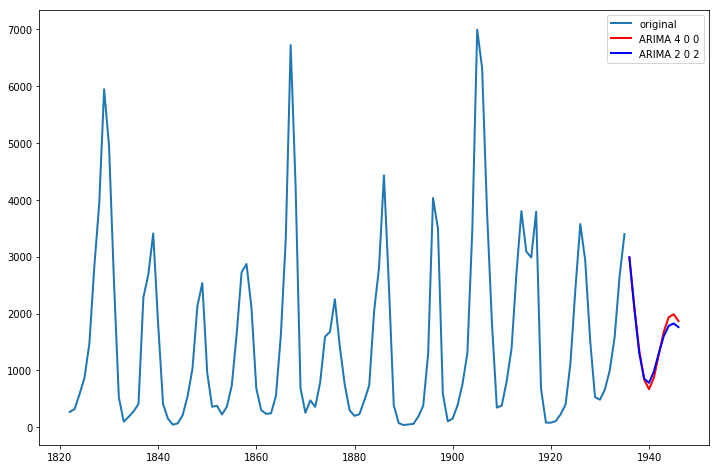

In [65]:
# Forecast comparison
plt.figure(figsize = (12, 8))
plt.plot(mylynxts, linewidth = 2, label = "original")
plt.plot(Fcast400, color='red', linewidth = 2,
         label = "ARIMA 4 0 0")
plt.plot(Fcast202, color='blue', linewidth = 2,
         label = "ARIMA 2 0 2")
plt.legend();

## Handling Seasonal Datasets and Working with Seasonality

In [66]:
nottem = pd.read_csv("nottem.csv", header = 0, names = ['index', 'temp'],
                     index_col = 0)
nottem.head()

,temp
index,
1,40.6
2,40.8
3,44.4
4,46.7
5,54.1


In [67]:
# Pandas DataFrame object with time stamp (monthly frequency)
nottem_df = pd.DataFrame((nottem.temp).values, columns = ['temperature'],
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))

In [68]:
# Pandas Series object with time stamp (monthly frequency)
nottemts = pd.Series((nottem.temp).values,
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))

In [69]:
nottem_df.head()

,temperature
1920-01-31,40.6
1920-02-29,40.8
1920-03-31,44.4
1920-04-30,46.7
1920-05-31,54.1


In [70]:
nottemts.head()

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
Freq: M, dtype: float64

In [71]:
# Month plot
from statsmodels.graphics.tsaplots import month_plot

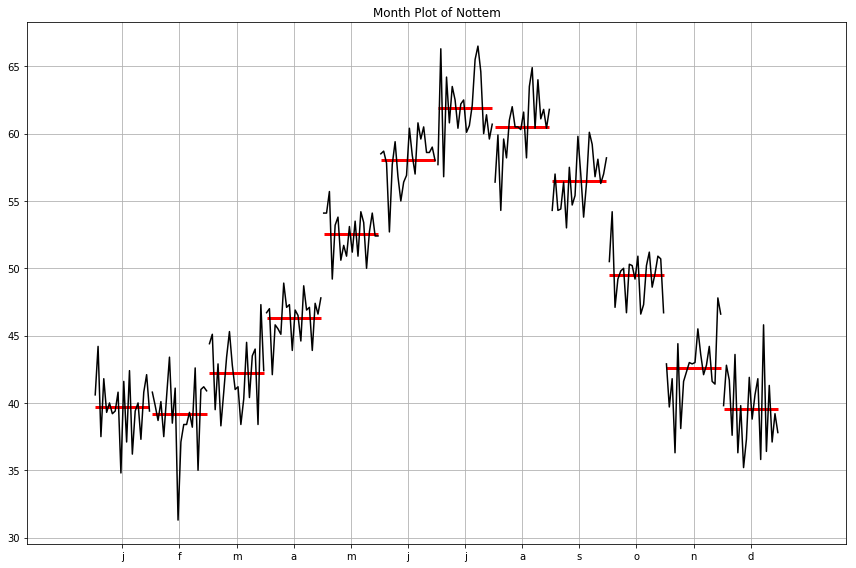

In [72]:
# Month_plot() data to have a monthly (12 or 'M') frequency
# Alternative: quarter_plot() for dataset with a frequency of 4 or 'Q'
fig, ax1 = plt.subplots(1, 1, figsize = (12,8))
month_plot(nottemts, ax = ax1)
plt.title("Month Plot of Nottem")
plt.grid(axis = 'both')
plt.tight_layout()

In [73]:
# Season plot
pivot_df = pd.pivot_table(nottem_df, index = nottem_df.index.month,
                          columns = nottem_df.index.year,
                          values = 'temperature')
pivot_df

,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939
1,40.6,44.2,37.5,41.8,39.3,40.0,39.2,39.4,40.8,34.8,41.6,37.1,42.4,36.2,39.4,40.0,37.3,40.8,42.1,39.4
2,40.8,39.8,38.7,40.1,37.5,40.5,43.4,38.5,41.1,31.3,37.1,38.4,38.4,39.3,38.2,42.6,35.0,41.0,41.2,40.9
3,44.4,45.1,39.5,42.9,38.3,40.8,43.4,45.3,42.8,41.0,41.2,38.4,40.3,44.5,40.4,43.5,44.0,38.4,47.3,42.4
4,46.7,47.0,42.1,45.8,45.5,45.1,48.9,47.1,47.3,43.9,46.9,46.5,44.6,48.7,46.9,47.1,43.9,47.4,46.6,47.8
5,54.1,54.1,55.7,49.2,53.2,53.8,50.6,51.7,50.9,53.1,51.2,53.5,50.9,54.2,53.4,50.0,52.7,54.1,52.4,52.4
6,58.5,58.7,57.8,52.7,57.7,59.4,56.8,55.0,56.4,56.9,60.4,58.4,57.0,60.8,59.6,60.5,58.6,58.6,59.0,58.0
7,57.7,66.3,56.8,64.2,60.8,63.5,62.5,60.4,62.2,62.5,60.1,60.6,62.1,65.5,66.5,64.6,60.0,61.4,59.6,60.7
8,56.4,59.9,54.3,59.6,58.2,61.0,62.0,60.5,60.5,60.3,61.6,58.2,63.5,64.9,60.4,64.0,61.1,61.8,60.4,61.8
9,54.3,57.0,54.3,54.4,56.4,53.0,57.5,54.7,55.4,59.8,57.0,53.8,56.3,60.1,59.2,56.8,58.1,56.3,57.0,58.2
10,50.5,54.2,47.1,49.2,49.8,50.0,46.7,50.3,50.2,49.2,50.9,46.6,47.3,50.2,51.2,48.6,49.6,50.9,50.7,46.7


In [74]:
month_names = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
pivot_df.index = month_names
pivot_df

,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939
Jan,40.6,44.2,37.5,41.8,39.3,40.0,39.2,39.4,40.8,34.8,41.6,37.1,42.4,36.2,39.4,40.0,37.3,40.8,42.1,39.4
Feb,40.8,39.8,38.7,40.1,37.5,40.5,43.4,38.5,41.1,31.3,37.1,38.4,38.4,39.3,38.2,42.6,35.0,41.0,41.2,40.9
Mar,44.4,45.1,39.5,42.9,38.3,40.8,43.4,45.3,42.8,41.0,41.2,38.4,40.3,44.5,40.4,43.5,44.0,38.4,47.3,42.4
Apr,46.7,47.0,42.1,45.8,45.5,45.1,48.9,47.1,47.3,43.9,46.9,46.5,44.6,48.7,46.9,47.1,43.9,47.4,46.6,47.8
May,54.1,54.1,55.7,49.2,53.2,53.8,50.6,51.7,50.9,53.1,51.2,53.5,50.9,54.2,53.4,50.0,52.7,54.1,52.4,52.4
Jun,58.5,58.7,57.8,52.7,57.7,59.4,56.8,55.0,56.4,56.9,60.4,58.4,57.0,60.8,59.6,60.5,58.6,58.6,59.0,58.0
Jul,57.7,66.3,56.8,64.2,60.8,63.5,62.5,60.4,62.2,62.5,60.1,60.6,62.1,65.5,66.5,64.6,60.0,61.4,59.6,60.7
Aug,56.4,59.9,54.3,59.6,58.2,61.0,62.0,60.5,60.5,60.3,61.6,58.2,63.5,64.9,60.4,64.0,61.1,61.8,60.4,61.8
Sep,54.3,57.0,54.3,54.4,56.4,53.0,57.5,54.7,55.4,59.8,57.0,53.8,56.3,60.1,59.2,56.8,58.1,56.3,57.0,58.2
Oct,50.5,54.2,47.1,49.2,49.8,50.0,46.7,50.3,50.2,49.2,50.9,46.6,47.3,50.2,51.2,48.6,49.6,50.9,50.7,46.7


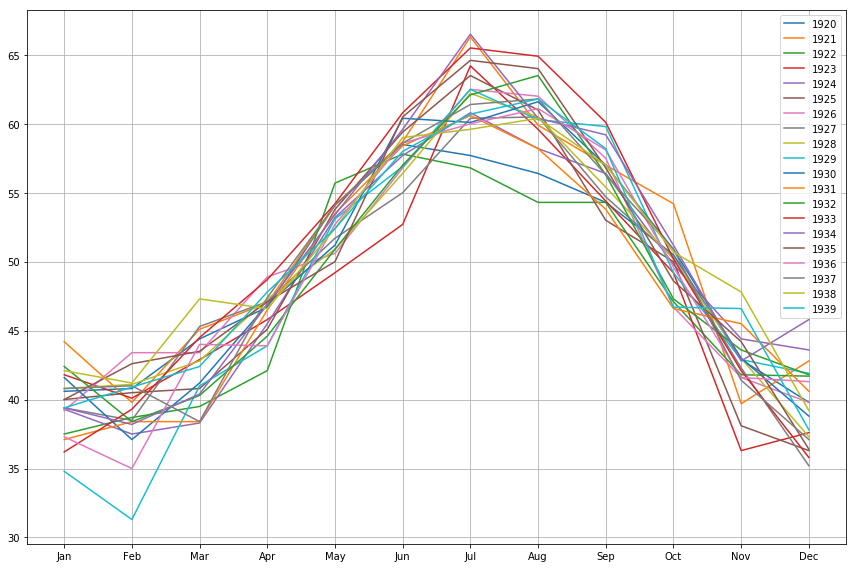

In [75]:
# Creating the season plot
plt.figure(figsize=(12,8))
plt.plot(pivot_df)
plt.grid(axis = 'both')
plt.legend(pivot_df.columns)
plt.tight_layout()

In [76]:
# Seasonal ARIMA model with pmdarima
import pmdarima as pm

In [77]:
help(pm.auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, exogenous=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=10, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method=None, transparams=True, solver='lbfgs', maxiter=None, disp=0, callback=None, offset_test_args=None, seasonal_test_args=None, suppress_warnings=False, error_action='warn', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept=True, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R fu

In [78]:
mySA = pm.auto_arima(nottemts, error_action="ignore", suppress_warnings = True,
                     seasonal = True, m = 12, start_q = 1, start_p = 1, 
                     start_Q = 0, start_P = 0, max_order = 5, max_d = 1,
                     max_D = 1, D = 1, stepwise = False, trace = True)

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=1207.408, BIC=1221.125, Fit time=0.260 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1056.862, BIC=1074.008, Fit time=1.558 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 2, 12); AIC=1050.378, BIC=1070.954, Fit time=2.675 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 0, 12); AIC=1081.445, BIC=1098.592, Fit time=1.418 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=1047.432, BIC=1068.008, Fit time=1.406 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=1047.670, BIC=1071.675, Fit time=3.180 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 1, 0, 12); AIC=1064.092, BIC=1084.668, Fit time=1.942 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 1, 1, 12); AIC=1046.907, BIC=1070.912, Fit time=3.517 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 1, 0, 12); AIC=1208.170, BIC=1225.317, Fit time=0.539 seconds
Fit ARIMA: order=(1, 0, 2) s

In [79]:
mySA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  240
Model:             SARIMAX(1, 0, 1)x(2, 1, 1, 12)   Log Likelihood                -516.453
Date:                            Mon, 10 Jun 2019   AIC                           1046.907
Time:                                    01:20:20   BIC                           1070.912
Sample:                                         0   HQIC                          1056.592
                                            - 240                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0267      0.032      0.840      0.401      -0.036       0.089
ar.L1          0.4471      0.240      1.864      0.062      -0.023       0.917
ma.L1         -0.1957      0.267     -0.732      0.464      -0.720       0.328
ar.S.L12      -0.1785      0.107     -1.669      0.095      -0.388       0.031
ar.S.L24       0.1451      0.104      1.391      0.164      -0.059       0.350
ma.S.L12      -0.8360      0.098     -8.564      0.000      -1.027      -0.645
sigma2         5.0503      0.512      9.866      0.000       4.047       6.053
===================================================================================
Ljung-Box (Q):                       43.82   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.31   Prob(JB):                         0.80
Heteroskedasticity (H):               0.88   Skew:                            -0.09
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

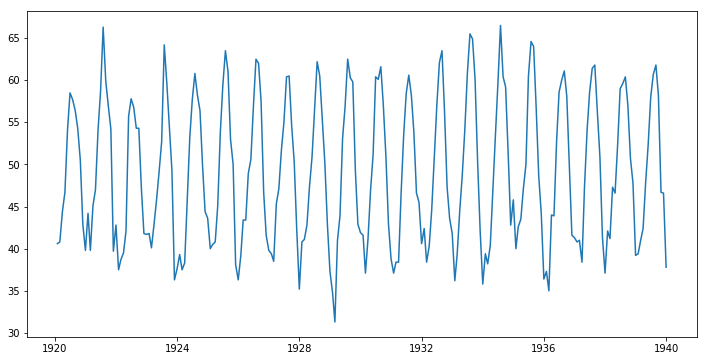

In [80]:
# Additive or multiplicative decomposition
plt.figure(figsize=(12,6))
plt.plot(nottemts);

In [81]:
# Seasonal Decomposition
# Simple seasonal decomposition with statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

In [82]:
# By default model = "additive"
nottem_decomposed = seasonal_decompose(nottemts)

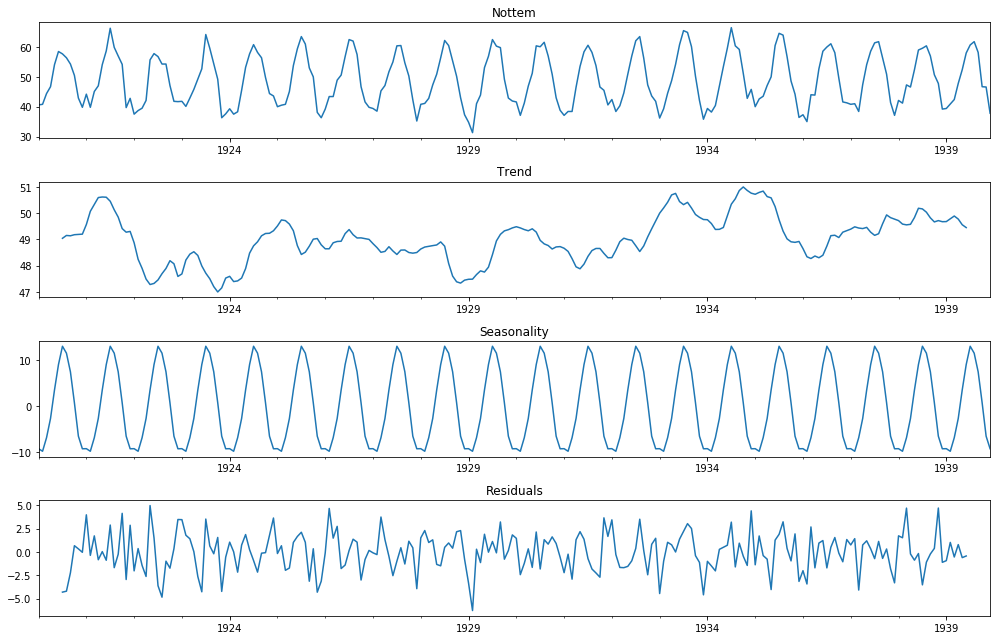

In [83]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (14,9))
nottemts.plot(ax = ax1)
nottem_decomposed.trend.plot(ax = ax2)
nottem_decomposed.seasonal.plot(ax = ax3)
nottem_decomposed.resid.plot(ax = ax4)
ax1.set_title("Nottem")
ax2.set_title("Trend")
ax3.set_title("Seasonality")
ax4.set_title("Residuals")
plt.tight_layout();

In [84]:
from stldecompose import decompose

In [85]:
nottem_stl = decompose(nottemts, period=12)

In [86]:
# No NaN
nottem_stl.trend.head()

1920-01-31    48.616042
1920-02-29    48.612980
1920-03-31    48.609917
1920-04-30    48.606960
1920-05-31    48.604002
Freq: M, dtype: float64

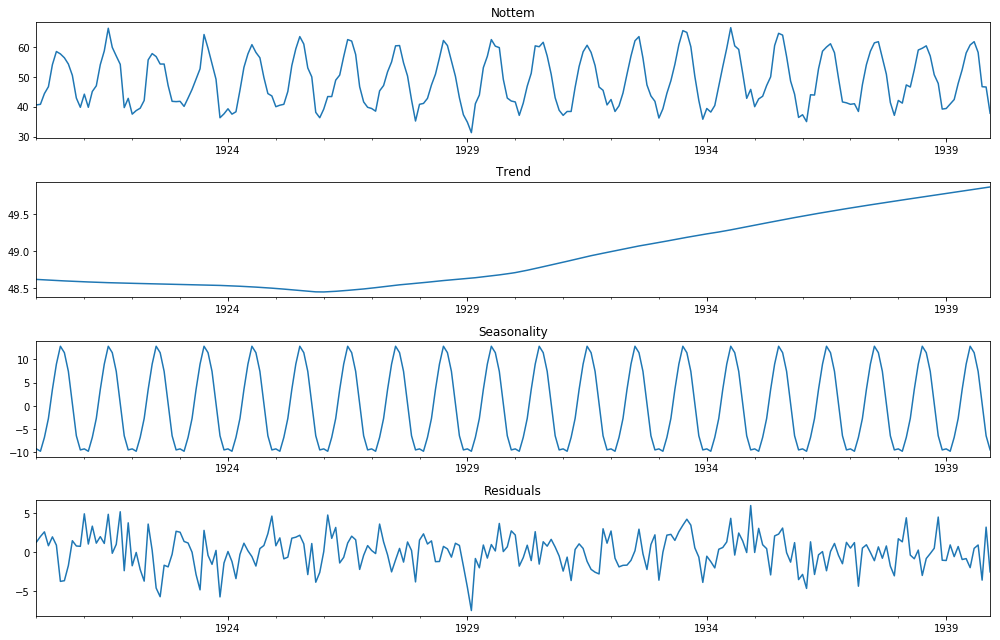

In [87]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (14,9))
nottemts.plot(ax = ax1)
nottem_stl.trend.plot(ax = ax2)
nottem_stl.seasonal.plot(ax = ax3)
nottem_stl.resid.plot(ax = ax4)
ax1.set_title("Nottem")
ax2.set_title("Trend")
ax3.set_title("Seasonality")
ax4.set_title("Residuals")
plt.tight_layout();

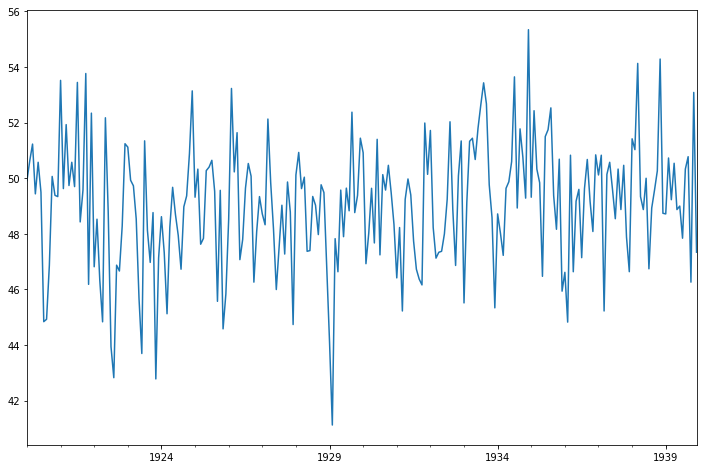

In [88]:
# Eliminating the seasonal component
nottem_adjusted = nottemts - nottem_stl.seasonal
plt.figure(figsize=(12,8))
nottem_adjusted.plot();

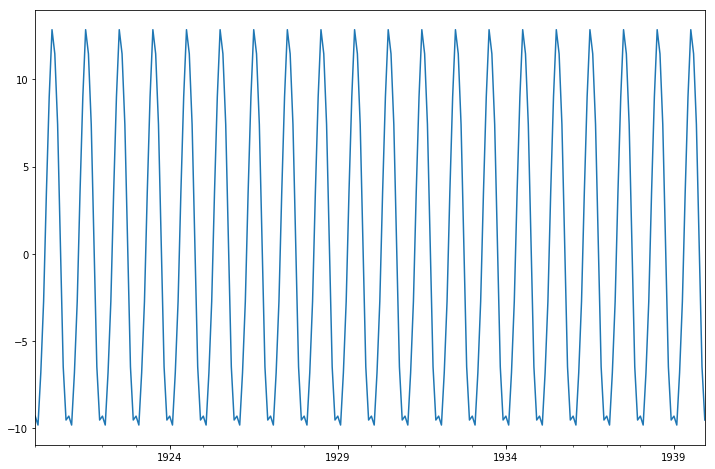

In [89]:
# Seasonality gives structure to the data
plt.figure(figsize=(12,8))
nottem_stl.seasonal.plot();

In [90]:
from stldecompose import forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)

In [91]:
stl_fcast = forecast(nottem_stl, steps=12, fc_func=seasonal_naive,
                     seasonal = True)

stl_fcast.head()

,seasonal_naive+seasonal
1940-01-31,40.508501
1940-03-02,40.006367
1940-04-02,43.014288
1940-05-03,47.111975
1940-06-03,53.384711


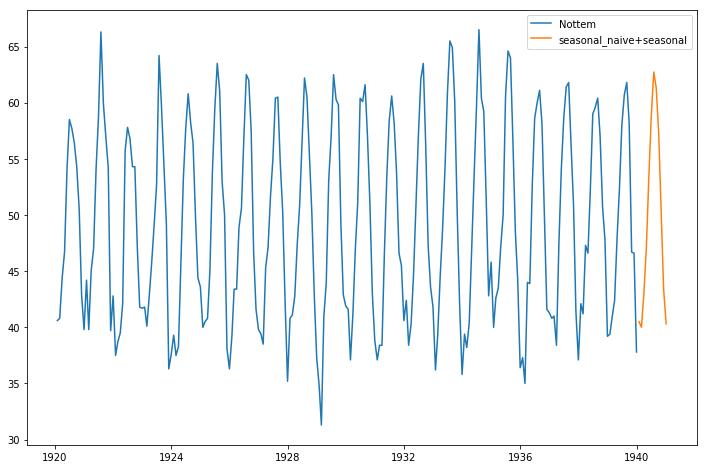

In [92]:
# Plot of the forecast and the original data
plt.figure(figsize=(12,8))
plt.plot(nottemts, label='Nottem')
plt.plot(stl_fcast, label=stl_fcast.columns[0])
plt.legend();

## Creating a Time Series Forecast using Exponential Smoothing Models

In [93]:
nottem = pd.read_csv("nottem.csv", header = 0, names = ['Month', 'Temp'],
                     index_col = 0)
nottem.head()

,Temp
Month,
1,40.6
2,40.8
3,44.4
4,46.7
5,54.1


In [94]:
# Conversion to a pandas Series object
nottemts = pd.Series((nottem.Temp).values,
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))

In [95]:
# Exponential smoothing function
from statsmodels.tsa.holtwinters import ExponentialSmoothing
help(ExponentialSmoothing)

Help on class ExponentialSmoothing in module statsmodels.tsa.holtwinters:

class ExponentialSmoothing(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  Holt Winter's Exponential Smoothing
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      Time series
 |  trend : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of trend component.
 |  damped : bool, optional
 |      Should the trend component be damped.
 |  seasonal : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of seasonal component.
 |  seasonal_periods : int, optional
 |      The number of seasons to consider for the holt winters.
 |  
 |  Returns
 |  -------
 |  results : ExponentialSmoothing class        
 |  
 |  Notes
 |  -----
 |  This is a full implementation of the holt winters exponential smoothing as
 |  per [1]. This includes all the unstable methods as well as the stable methods.
 |  The implementation of the library covers the functionality of the R 
 

In [96]:
# Setting up the model Holt-Winters(A,N,A)
expsmodel = ExponentialSmoothing(nottemts, seasonal = "additive",
                                 seasonal_periods = 12)

In [97]:
# Fitting the model
expsmodelfit = expsmodel.fit()

In [98]:
# Getting the alpha smoothing coefficient
expsmodelfit.params['smoothing_level']

0.031012984092332472

In [99]:
# Getting the gamma smoothing coefficient
expsmodelfit.params['smoothing_seasonal']

0.0

In [100]:
# Prediction
# Alternative: expsmodelfit.forecast(steps = 12)
expsfcast = expsmodelfit.predict(start = 240, end = 251)

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


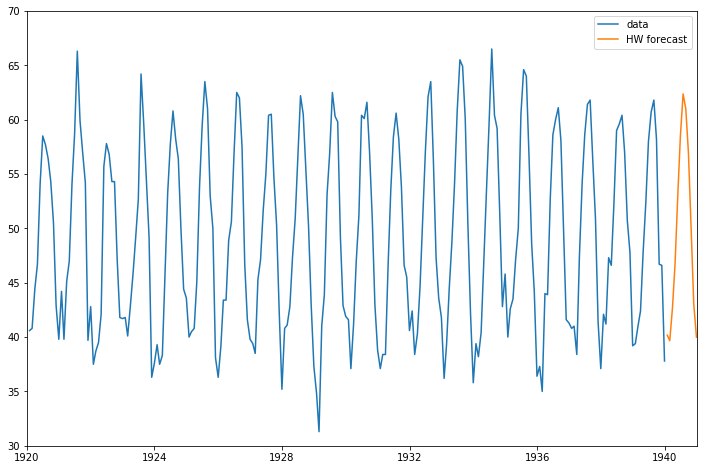

In [101]:
# Plotting the predicted values and the original data
plt.figure(figsize=(12,8))
plt.plot(nottemts, label='data')
plt.plot(expsfcast, label='HW forecast')
plt.xlim('1920','1941'); plt.ylim(30,70);
plt.legend();

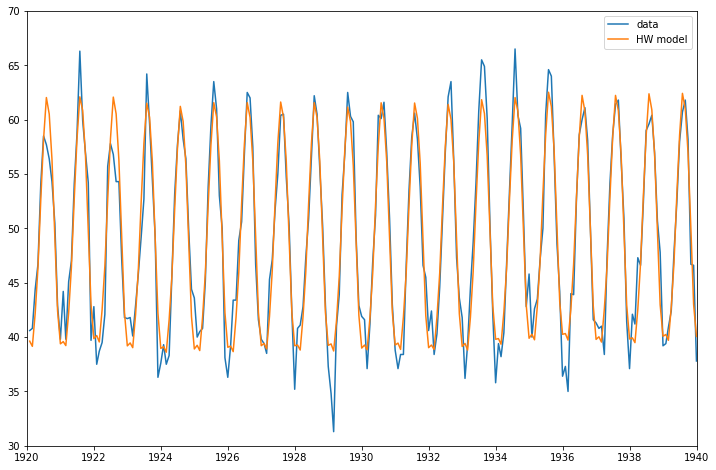

In [102]:
# Comparing the model and the original values
plt.figure(figsize=(12,8))
plt.plot(nottemts, label='data')
plt.plot(expsmodelfit.fittedvalues, label='HW model')
plt.xlim('1920','1940'); plt.ylim(30,70);
plt.legend();

## FbProphet

In [103]:
from fbprophet import Prophet

## Data preparation
## Naming convention: 'ds' = time stamp, 'y' = observations

In [104]:
import pandas as pd
nottem = pd.read_csv("nottem.csv", header = 0, names = ['Month', 'Temp'],
                     index_col = 0)
# Generating the time stamp
nottemts = pd.Series((nottem.Temp).values,
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))
nottemts.head()

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
Freq: M, dtype: float64

In [105]:
# Create a pandas.DataFrame with the values of nottemts
nottem_df = pd.DataFrame({'ds':nottemts.index, 
                          'y':nottemts.values})
nottem_df.head()

,ds,y
0,1920-01-31,40.6
1,1920-02-29,40.8
2,1920-03-31,44.4
3,1920-04-30,46.7
4,1920-05-31,54.1


In [106]:
nottem_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [107]:
# Make the prophet model and fit on the data
mymodel = Prophet()
mymodel.fit(nottem_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [108]:
# Forecast
future_data = mymodel.make_future_dataframe(periods = 12,
                                            freq = 'm')
fcast = mymodel.predict(future_data)

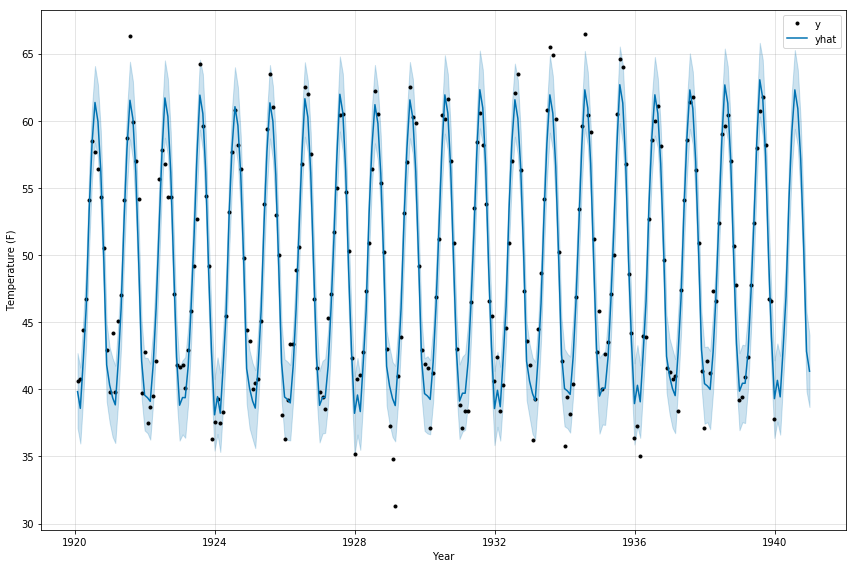

In [109]:
fig, ax1 = plt.subplots(1,1, figsize = (12, 8))
mymodel.plot(fcast, ax = ax1);
plt.ylabel('Temperature (F)')
plt.xlabel('Year')
plt.legend();